# **Appendix A:** Resolution Study
| Author  | Stanley A. Baronett  |
|---------|----------------------|
| Created |  02/13/2022          |
| Updated |  01/17/2023          |

## **Figure A1.** Dispersions ($\Pi = 0.05$)

/home/stanley/bitbucket/ccyang/athena-dust/vis/python/athena_read.py:66: AthenaWarning: Multiple headers found; using most recent data
  warnings.warn('Multiple headers found; using most recent data', AthenaWarning)


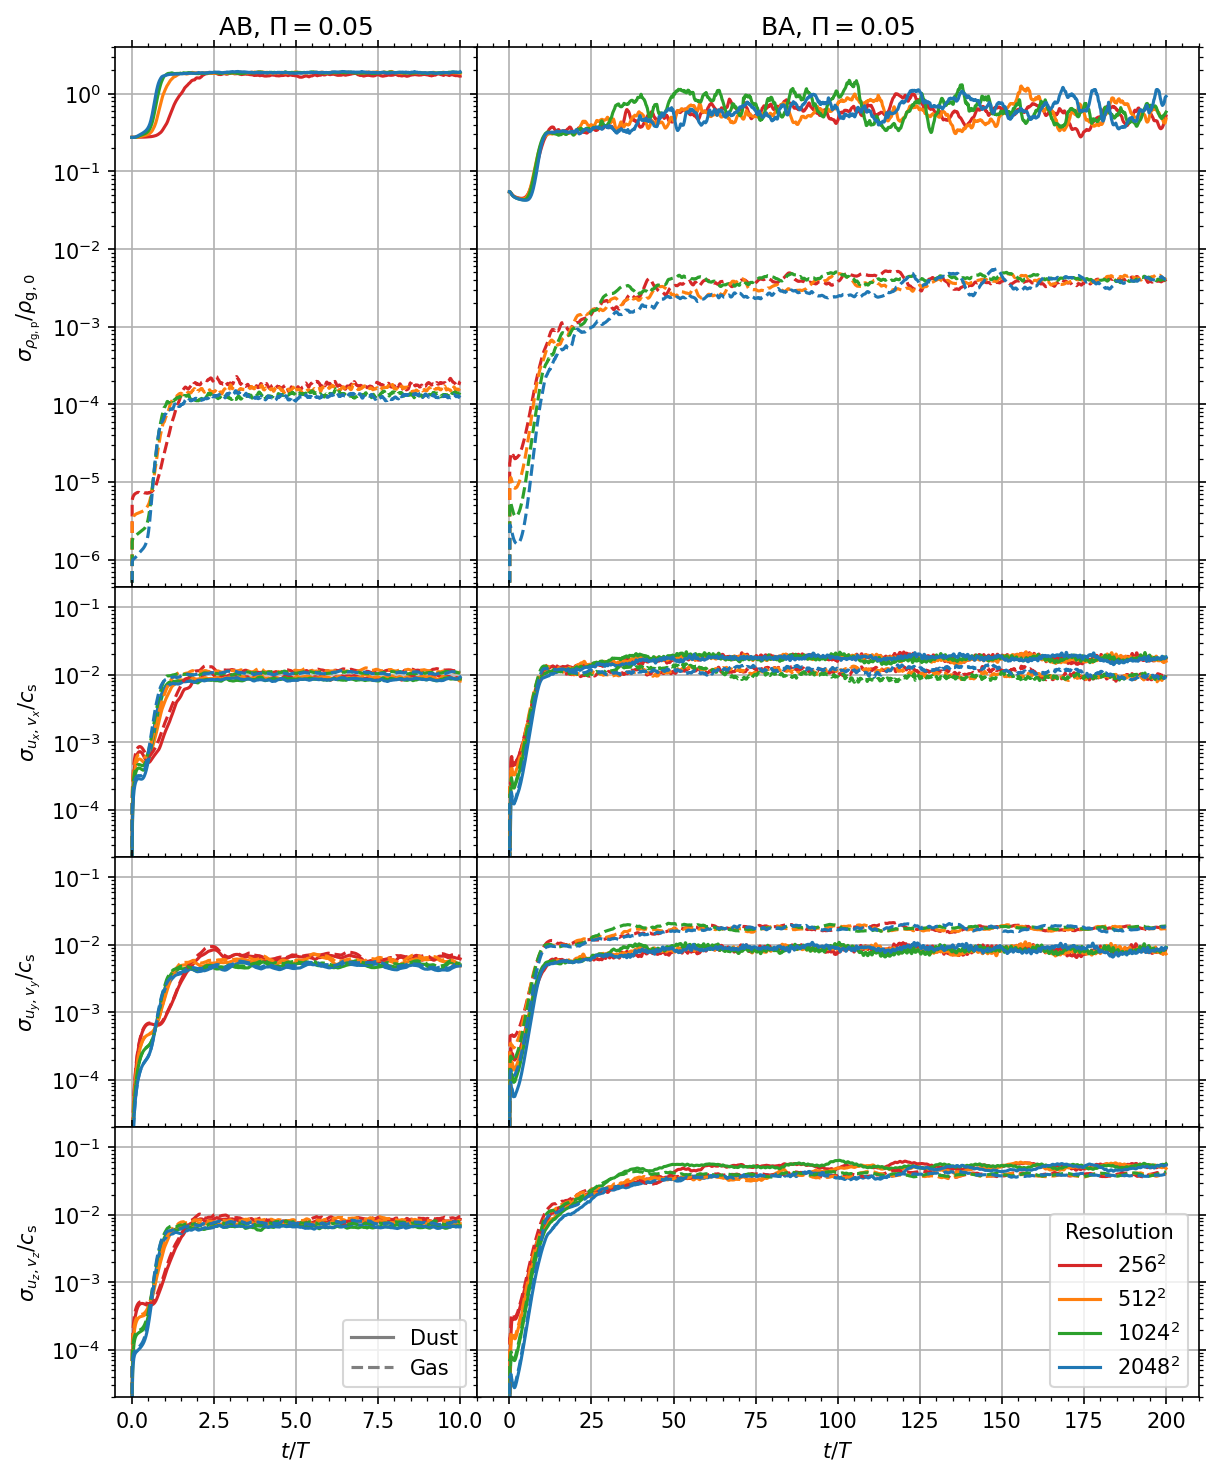

In [1]:
#==============================================================================
import sys
sys.path.insert(0, '/home/stanley/bitbucket/ccyang/athena-dust/vis/python')
import athena_read
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fig, axs = plt.subplots(4, 2, sharex='col', sharey='row', width_ratios=[1, 2],
                        height_ratios=[2, 1, 1, 1], figsize=(9.32, 11.69),#9.1),
                        dpi=150)
workdir = '../unstrat'
cases = ['AB', 'BA']
Pi = 0.05
reses = [['256', 'tab:red'], ['512', 'tab:orange'],
       ['1024', 'tab:green'], ['2048', 'tab:blue']]
vylim = (2e-5, 2e-1)
i_sat = -500
tcases, treses = [], []
avg_sd_rhog, avg_sd_ux, avg_sd_uy, avg_sd_uz,  = [], [], [], []
err_sd_rhog, err_sd_ux, err_sd_uy, err_sd_uz,  = [], [], [], []
avg_sd_rhop, avg_sd_vx, avg_sd_vy, avg_sd_vz,  = [], [], [], []
err_sd_rhop, err_sd_vx, err_sd_vy, err_sd_vz,  = [], [], [], []
avg_Dux, avg_Duy, err_Dux, err_Duy = [], [], [], []
AVG_keys = [avg_sd_rhop, avg_sd_vx, avg_sd_vy, avg_sd_vz, avg_sd_rhog, avg_sd_ux, avg_sd_uy, avg_sd_uz]
ERR_keys = [err_sd_rhop, err_sd_vx, err_sd_vy, err_sd_vz, err_sd_rhog, err_sd_ux, err_sd_uy, err_sd_uz]
AVG_vals, ERR_vals = [], []

for i, case in enumerate(cases):
    for res in reses:
        # Collect simulation parameters and history file
        athinput = athena_read.athinput(f'{workdir}/{case}/{Pi}/{res[0]}/athinput.si')
        epsilon = athinput['problem']['epsilon']
        c_s = athinput['hydro']['iso_sound_speed']
        Lx = athinput['mesh']['x1max'] - athinput['mesh']['x1min']
        Ly = athinput['mesh']['x2max'] - athinput['mesh']['x2min']
        Lz = athinput['mesh']['x3max'] - athinput['mesh']['x3min']
        Mg = Lx*Ly*Lz
        Mp = epsilon*Mg
        hst = athena_read.hst(f'{workdir}/{case}/{Pi}/{res[0]}/output/SI.hst')

        # Compute dispersions, gas velocity deviations, and time averages
        sd_rhop = np.sqrt(hst['drhop2'] - (hst['drhop'])**2)
        sd_vx   = np.sqrt(hst['dvpx2']/Mp - (hst['dvpx']/Mp)**2)
        sd_vy   = np.sqrt(hst['dvpy2']/Mp - (hst['dvpy']/Mp)**2)
        sd_vz   = np.sqrt(hst['dvpz2']/Mp - (hst['dvpz']/Mp)**2)
        sd_rhog = np.sqrt(hst['drhog2'] - (hst['drhog'])**2)
        sd_ux   = np.sqrt(hst['dux2']/Mg - (hst['dux']/Mg)**2)
        sd_uy   = np.sqrt(hst['duy2']/Mg - (hst['duy']/Mg)**2)
        sd_uz   = np.sqrt(2*hst['2-KE']/Mg - (hst['2-mom']/Mg)**2)
        Dux = hst['dux']/Mg
        Duy = hst['duy']/Mg
        tcases.append(f'{case}')
        treses.append(f'{float(res[0])}')

        avg_sd_rhog.append(np.mean(sd_rhog[i_sat:]))
        avg_sd_ux.append(np.mean(sd_ux[i_sat:])/c_s)
        avg_sd_uy.append(np.mean(sd_uy[i_sat:])/c_s)
        avg_sd_uz.append(np.mean(sd_uz[i_sat:])/c_s)
        avg_sd_rhop.append(np.mean(sd_rhop[i_sat:]))
        avg_sd_vx.append(np.mean(sd_vx[i_sat:])/c_s)
        avg_sd_vy.append(np.mean(sd_vy[i_sat:])/c_s)
        avg_sd_vz.append(np.mean(sd_vz[i_sat:])/c_s)
        avg_Dux.append(np.mean(Dux[i_sat:])/c_s)
        avg_Duy.append(np.mean(Duy[i_sat:])/c_s)
        err_sd_rhog.append(np.std(sd_rhog[i_sat:]))
        err_sd_ux.append(np.std(sd_ux[i_sat:])/c_s)
        err_sd_uy.append(np.std(sd_uy[i_sat:])/c_s)
        err_sd_uz.append(np.std(sd_uz[i_sat:])/c_s)
        err_sd_rhop.append(np.std(sd_rhop[i_sat:]))
        err_sd_vx.append(np.std(sd_vx[i_sat:])/c_s)
        err_sd_vy.append(np.std(sd_vy[i_sat:])/c_s)
        err_sd_vz.append(np.std(sd_vz[i_sat:])/c_s)
        err_Dux.append(np.std(Dux[i_sat:])/c_s)
        err_Duy.append(np.std(Duy[i_sat:])/c_s)

        # Plot dispersions
        axs[0][i].semilogy(hst['time'], sd_rhop,   color=res[1])
        axs[1][i].semilogy(hst['time'], sd_vx/c_s, color=res[1])
        axs[2][i].semilogy(hst['time'], sd_vy/c_s, color=res[1])
        axs[3][i].semilogy(hst['time'], sd_vz/c_s, color=res[1],
                           label=res[0]+r'$^2$')
        axs[0][i].semilogy(hst['time'], sd_rhog,   color=res[1],
                           ls='--', zorder=10)
        axs[1][i].semilogy(hst['time'], sd_ux/c_s, color=res[1],
                           ls='--', zorder=10)
        axs[2][i].semilogy(hst['time'], sd_uy/c_s, color=res[1],
                           ls='--', zorder=10)
        axs[3][i].semilogy(hst['time'], sd_uz/c_s, color=res[1],
                           ls='--', zorder=10)

# Plot ghost points for colorless line style and add legends
ls_dust, = axs[3][0].semilogy([], [], color='tab:gray', label='Dust')
ls_gas,  = axs[3][0].semilogy([], [], color='tab:gray', ls='--', label='Gas')
axs[3][0].legend(handles=[ls_dust, ls_gas], loc='lower right')
axs[3][1].legend(loc='lower right', title='Resolution')

# Format subplots
for ax in axs.flat:
    ax.grid()
    ax.minorticks_on()
    ax.tick_params(which='both', top=True, right=True)

axs[0][0].set(title=f'AB, $\Pi={Pi}$', 
              ylabel=r'$\sigma_{\rho_\mathrm{g,p}}/\rho_\mathrm{g,0}$')
axs[0][1].set(title=f'BA, $\Pi={Pi}$')
axs[1][0].set(ylabel=r'$\sigma_{u_x,v_x}/c_\mathrm{s}$', ylim=vylim)
axs[2][0].set(ylabel=r'$\sigma_{u_y,v_y}/c_\mathrm{s}$', ylim=vylim)
axs[3][0].set(ylabel=r'$\sigma_{u_z,v_z}/c_\mathrm{s}$', ylim=vylim)
axs[3][0].set(xlabel=r'$t/T$')
axs[3][1].set(xlabel=r'$t/T$')

plt.subplots_adjust(hspace=0, wspace=0)
plt.savefig(f'figs/res_dispersions-{Pi}.pdf', bbox_inches='tight', pad_inches=0.01)
# plt.savefig('figs/png/res_dispersions.png', bbox_inches='tight', pad_inches=0.01, dpi=1200)

# Compute average and std. dev. of percentage errors per case
for i, key in enumerate(AVG_keys):
    AVG_vals.append(key)
    ERR_vals.append(ERR_keys[i])
AVG_vals = np.asarray(AVG_vals)
ERR_vals = np.asarray(ERR_vals)
PE_vals = ERR_vals/AVG_vals
# print(PE_vals[:, 0])
avg_PEs = np.average(PE_vals, axis=0)
std_PEs = np.std(PE_vals, axis=0)

df = pd.DataFrame({
    'case' : tcases,
    'Res.'  : treses,
    '3a'   : avg_sd_rhop,
    '3b'   : err_sd_rhop,
    '4a'   : avg_sd_vx,
    '4b'   : err_sd_vx,
    '5a'   : avg_sd_vy,
    '5b'   : err_sd_vy,
    '6a'   : avg_sd_vz,
    '6b'   : err_sd_vz,
    '7a'   : avg_sd_rhog,
    '7b'   : err_sd_rhog,
    '8a'   : avg_sd_ux,
    '8b'   : err_sd_ux,
    '9a'   : avg_sd_uy,
    '9b'   : err_sd_uy,
    '10a'  : avg_sd_uz,
    '10b'  : err_sd_uz,
    # '20a'  : avg_Dux,
    # '20b'  : err_Dux,
    # '21a'  : avg_Duy,
    # '21b'  : err_Duy,
    '30a'  : avg_PEs,
    '30b'  : std_PEs,
    })
s = df.style.format({
    '3a'  : '{:.3f}',
    '3b'  : '({:.0e})',
    '4a'  : '{:.3e}',
    '4b'  : '({:.0e})',
    '5a'  : '{:.3e}',
    '5b'  : '({:.0e})',
    '6a'  : '{:.3e}',
    '6b'  : '({:.0e})',
    '7a'  : '{:.3e}',
    '7b'  : '({:.0e})',
    '8a'  : '{:.3e}',
    '8b'  : '({:.0e})',
    '9a'  : '{:.3e}',
    '9b'  : '({:.0e})',
    '10a' : '{:.3e}',
    '10b' : '({:.0e})',
    # r'$\overline{\Delta u_x}$ / $\cs$'        : '{:.2e}',
    # '11'                                      : '({:.0e})',
    # r'$\overline{\Delta u_y}$ / $\cs$'        : '{:.2e}',
    # '12'                                      : '({:.0e})',
    '30a'  : '{:.1%}',
    '30b'  : '{:.1%}',
    })
# s.to_latex(buf='tabs/disps.sty')
s

## **Figure A2.** Densities

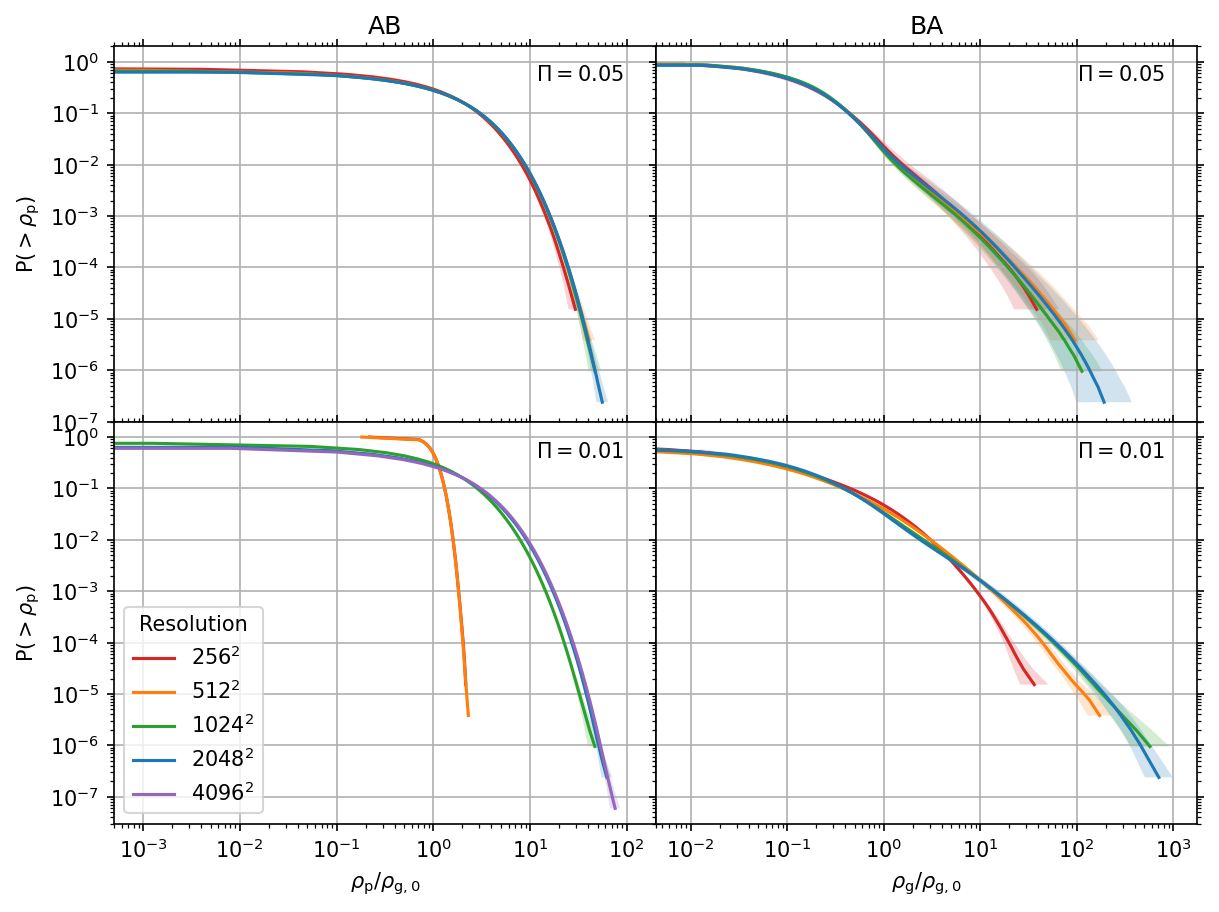

In [2]:
#==============================================================================
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

dylim005, dylim001 = (1e-7, 2e0), (3e-8, 2e0)
yratio = (np.log10(dylim001[1]) - np.log10(dylim001[0])) /\
         (np.log10(dylim005[1]) - np.log10(dylim005[0]))
fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(9.32, 6.73),
                        height_ratios=[1, yratio], dpi=150)
workdir = '../unstrat'
cases = ['AB', 'BA']
Pis = [0.05, 0.01]
reses = [['256', 'tab:red'], ['512', 'tab:orange'],
         ['1024', 'tab:green'], ['2048', 'tab:blue'],
         ['4096', 'tab:purple']]
runs, avg_maxs, err_maxs = [], [[], []], [[], []]

for j, Pi in enumerate(Pis):
    for i, case in enumerate(cases):
        for res in reses:
            if (Pi == 0.05 or case == 'BA') and res[0] == '4096': break
            indices = -np.unique(np.logspace(np.log2(int(res[0])**2), 0,
                                             num=100, base=2, dtype=int))
            path = f'{workdir}/{cases[i]}/{Pi}/{res[0]}' 
            runs.append(f'{cases[i]}/{Pi}/{res[0]}')
            
            # Plot dust density CDF
            data = np.load(f'{path}/npz/cpdd.npz')
            take = np.take_along_axis(data['cdf'], indices, 0)
            cdf = np.flip(take)
            take = np.take_along_axis(data['avgs'], indices, 0)
            avgs = np.flip(take)
            take = np.take_along_axis(data['stds'], indices, 0)
            stds = np.flip(take)
            axs[j][i].loglog(avgs, cdf, color=res[1], label=f'{res[0]}$^2$')
            axs[j][i].fill_betweenx(cdf, avgs/stds, avgs*stds, color=res[1],
                                    ec=None, alpha=0.2)
            avg_maxs[0].append(avgs[-1])
            err_maxs[0].append(stds[-1])

for ax in axs.flat:
    ax.grid()
    ax.minorticks_on()
    ax.tick_params(which='both', top=True, right=True)

axs[0][0].set(ylabel=r'P$(>\rho_\mathrm{p})$', ylim=dylim005, title=f'{cases[0]}')
axs[0][0].text(0.94, 0.95, f'$\Pi={Pis[0]}$', ha='right', va='top',
               transform=axs[0][0].transAxes)
axs[0][1].set(yscale='log', title=f'{cases[1]}')
axs[0][1].text(0.94, 0.95, f'$\Pi={Pis[0]}$', ha='right', va='top',
               transform=axs[0][1].transAxes)
axs[1][0].legend(loc='lower left', title='Resolution')
axs[1][0].set(xlim=(5e-4, 2e2), ylim=dylim001,
              xlabel=r'$\rho_\mathrm{p}/\rho_\mathrm{g,0}$',
              ylabel=r'P$(>\rho_\mathrm{p})$')
axs[1][0].text(0.94, 0.95, f'$\Pi={Pis[1]}$', ha='right', va='top',
               transform=axs[1][0].transAxes)
axs[1][1].set(xlabel=r'$\rho_\mathrm{g}/\rho_\mathrm{g,0}$')
axs[1][1].text(0.94, 0.95, f'$\Pi={Pis[1]}$', ha='right', va='top',
               transform=axs[1][1].transAxes)
plt.subplots_adjust(hspace=0, wspace=0)
plt.savefig(f'figs/res_densities.pdf', bbox_inches='tight', pad_inches=0.01)
# plt.savefig('figs/png/res_densities.png', bbox_inches='tight', pad_inches=0.01, dpi=1200)

df = pd.DataFrame({
    'Run'             : runs,
    '⟨max(𝜌ₚ)⟩/𝜌₀'   : avg_maxs[0],
    '+𝜎_max(𝜌ₚ)/𝜌₀' : np.asarray(avg_maxs[0])*(1*np.asarray(err_maxs[0]) - 1),
    '-𝜎_max(𝜌ₚ)/𝜌₀' : np.asarray(avg_maxs[0])*(1/np.asarray(err_maxs[0]) - 1),})
    # '⟨max(𝜌)⟩/𝜌₀'   : (np.asarray(avg_maxs[1]) - 1),
    # '𝜎_max(𝜌)/𝜌₀'  : err_maxs[1]})
s = df.style.format({
    '⟨max(𝜌ₚ)⟩/𝜌₀'   : '{:.1f}',
    '+𝜎_max(𝜌ₚ)/𝜌₀' : '{:.1f}',
    '-𝜎_max(𝜌ₚ)/𝜌₀' : '{:.1f}',})
    # '⟨max(𝜌)⟩/𝜌₀'   : '1 + {:.1e}',
    # '𝜎_max(𝜌)/𝜌₀'  : '±{:.1e}'})
# s.to_latex(buf='tabs/densities.sty')
# s

## **Figure A3.** AB Auto-correlation Radial Profile

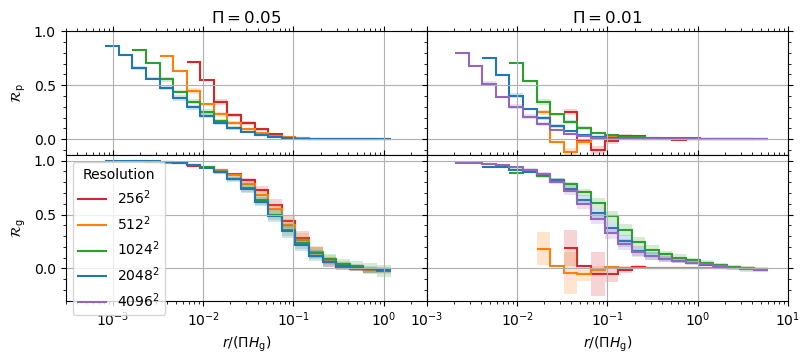

In [1]:
#==============================================================================
import sys
sys.path.insert(0, '/home/stanley/bitbucket/ccyang/athena-dust/vis/python')
import athena_read
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

def norms(xv, zv, pole):
    rv = np.zeros((len(zv), len(xv)))
    for i, z in enumerate(zv):
        for j, x in enumerate(xv):
            rv[i][j] = np.sqrt((x - pole[0])**2 + (z - pole[1])**2)
    return rv

y0lim, y1lim = (-0.15, 1), (-0.3, 1.05)
yratio = (y1lim[1] - y1lim[0])/(y0lim[1] - y0lim[0])
fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', height_ratios=[1, yratio],
                        figsize=(9.32, 3.5))
workdir = '../unstrat'
case = 'AB'
Pis = [0.05, 0.01]
reses = [[256, 'tab:red'], [512, 'tab:orange'],
         [1024, 'tab:green'], [2048, 'tab:blue'],
         [4096, 'tab:purple']]

for j, Pi in enumerate(Pis):
    for i, res in enumerate(reses):
        if Pi == 0.05 and res[0] == 4096: break
        # Collect inputs
        path = f'{workdir}/{case}/{Pi}/{res[0]}'
        npz = np.load(f'{path}/npz/avgRs.npz')
        athinput = athena_read.athinput(f'{path}/athinput.si')
        c_s = athinput['hydro']['iso_sound_speed']
        Omega = athinput['problem']['omega']
        H_g = c_s/Omega
        data = athena_read.athdf(f'{path}/athdf/SI.out1.00100.athdf')
        xv, zv = data['x1v']/H_g, data['x2v']/H_g
        x0, z0 = len(xv)//2, len(zv)//2
        pole = (xv[x0], zv[z0])
        rv = norms(xv, zv, pole).ravel()
        indices = np.where(rv > xv[-1])[0]
        indices = np.append(indices, np.where(rv == 0)[0])
        rv = np.delete(rv, indices)
        r0 = xv[x0]
        base = np.sqrt(2)
        leftmost_edge = r0/np.sqrt(base)
        num = int(np.sqrt(res[0]))
        bin_edges = leftmost_edge*np.logspace(0, num, num=(num + 1), base=base)

        # Bin dust
        avgRp = np.delete(npz['avgRps'], indices).ravel()
        dust_means, bin_edges, binnumnber = stats.binned_statistic(rv, avgRp,
            statistic='mean', bins=bin_edges)
        dust_stds, bin_edges, binnumnber = stats.binned_statistic(rv, avgRp,
            statistic='std', bins=bin_edges)
        dust_highs = dust_means + dust_stds
        dust_lows = dust_means - dust_stds

        # Bin gas
        avgRg = np.delete(npz['avgRgs'], indices).ravel()
        gas_means, bin_edges, binnumnber = stats.binned_statistic(rv, avgRg,
            statistic='mean', bins=bin_edges)
        gas_stds, bin_edges, binnumnber = stats.binned_statistic(rv, avgRg,
            statistic='std', bins=bin_edges)
        gas_highs = gas_means + gas_stds
        gas_lows = gas_means - gas_stds

        # Plot histograms
        axs[0][j].stairs(dust_means, bin_edges/float(Pi), color=res[1],
                         baseline=float('-inf'), lw=1.5)
        axs[0][j].stairs(dust_highs, bin_edges/float(Pi), baseline=dust_lows,
                         fill=True, color=res[1], alpha=0.2)
        axs[1][j].stairs(gas_means, bin_edges/float(Pi), color=res[1], lw=1.5,
                         baseline=float('-inf'),label=f'{res[0]}$^2$')
        axs[1][j].stairs(gas_highs, bin_edges/float(Pi), baseline=gas_lows,
                         fill=True, color=res[1], alpha=0.2)

for ax in axs.flat:
    ax.grid()
    ax.label_outer()
    ax.minorticks_on()
    ax.tick_params(axis='both', which='both', top=True, right=True)

# Format and save figure
axs[0][0].set(ylim=y0lim, ylabel=r'$\mathcal{R}_\mathrm{p}$',
              title=f'$\Pi = {Pis[0]}$')
axs[0][1].set(title=f'$\Pi = {Pis[1]}$')
axs[1][0].plot([], [], color=reses[4][1], label=str(reses[4][0])+r'$^2$')
axs[1][0].legend(loc='upper left', title='Resolution')
axs[1][0].set(ylim=y1lim, ylabel=r'$\mathcal{R}_\mathrm{g}$',
              xlim=(3e-4, 3e0), xscale='log', xlabel=r'$r/(\Pi H_\mathrm{g})$')
axs[1][1].set(xlim=(1e-3, 1e1), xscale='log', xlabel=r'$r/(\Pi H_\mathrm{g})$')
plt.subplots_adjust(hspace=0, wspace=0)
plt.savefig(f'figs/res_{case}_avgRs_rad-prof.pdf', bbox_inches='tight',
            pad_inches=0.01)


## **Figure A4.** Dispersions ($\Pi = 0.01$)

/home/stanley/bitbucket/ccyang/athena-dust/vis/python/athena_read.py:66: AthenaWarning: Multiple headers found; using most recent data
  warnings.warn('Multiple headers found; using most recent data', AthenaWarning)


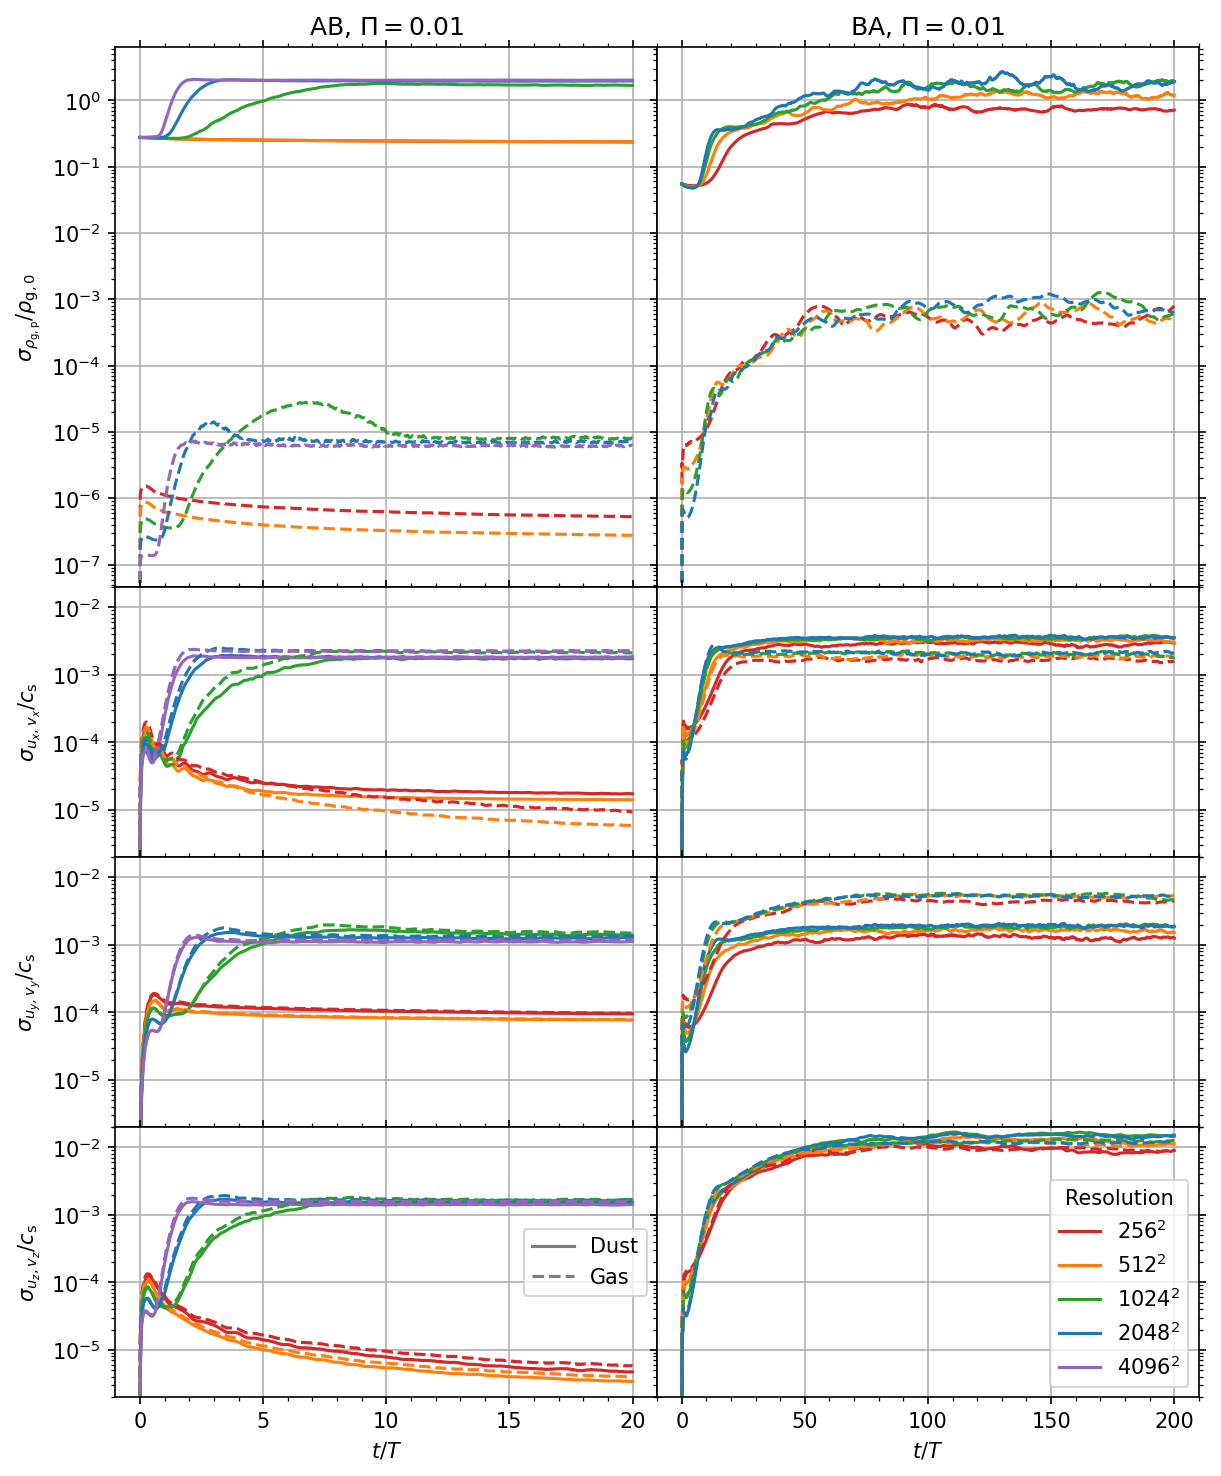

In [1]:
#==============================================================================
import sys
sys.path.insert(0, '/home/stanley/bitbucket/ccyang/athena-dust/vis/python')
import athena_read
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fig, axs = plt.subplots(4, 2, sharex='col', sharey='row', width_ratios=[1, 1],
                        height_ratios=[2, 1, 1, 1], figsize=(9.32, 11.69),#9.1),
                        dpi=150)
workdir = '../unstrat'
cases = ['AB', 'BA']
Pi = 0.01
reses = [['256', 'tab:red'], ['512', 'tab:orange'],
         ['1024', 'tab:green'], ['2048', 'tab:blue'],
         ['4096', 'tab:purple']]
vylim = (2e-6, 2e-2)
i_sat = -500
tcases, treses = [], []
avg_sd_rhog, avg_sd_ux, avg_sd_uy, avg_sd_uz,  = [], [], [], []
err_sd_rhog, err_sd_ux, err_sd_uy, err_sd_uz,  = [], [], [], []
avg_sd_rhop, avg_sd_vx, avg_sd_vy, avg_sd_vz,  = [], [], [], []
err_sd_rhop, err_sd_vx, err_sd_vy, err_sd_vz,  = [], [], [], []
avg_Dux, avg_Duy, err_Dux, err_Duy = [], [], [], []
AVG_keys = [avg_sd_rhop, avg_sd_vx, avg_sd_vy, avg_sd_vz, avg_sd_rhog, avg_sd_ux, avg_sd_uy, avg_sd_uz]
ERR_keys = [err_sd_rhop, err_sd_vx, err_sd_vy, err_sd_vz, err_sd_rhog, err_sd_ux, err_sd_uy, err_sd_uz]
AVG_vals, ERR_vals = [], []

for i, case in enumerate(cases):
    for res in reses:
        if case == 'BA' and res[0] == '4096': break
        # Collect simulation parameters and history file
        athinput = athena_read.athinput(f'{workdir}/{case}/{Pi}/{res[0]}/athinput.si')
        epsilon = athinput['problem']['epsilon']
        c_s = athinput['hydro']['iso_sound_speed']
        Lx = athinput['mesh']['x1max'] - athinput['mesh']['x1min']
        Ly = athinput['mesh']['x2max'] - athinput['mesh']['x2min']
        Lz = athinput['mesh']['x3max'] - athinput['mesh']['x3min']
        Mg = Lx*Ly*Lz
        Mp = epsilon*Mg
        hst = athena_read.hst(f'{workdir}/{case}/{Pi}/{res[0]}/output/SI.hst')

        # Compute dispersions, gas velocity deviations, and time averages
        sd_rhop = np.sqrt(hst['drhop2'] - (hst['drhop'])**2)
        sd_vx   = np.sqrt(hst['dvpx2']/Mp - (hst['dvpx']/Mp)**2)
        sd_vy   = np.sqrt(hst['dvpy2']/Mp - (hst['dvpy']/Mp)**2)
        sd_vz   = np.sqrt(hst['dvpz2']/Mp - (hst['dvpz']/Mp)**2)
        sd_rhog = np.sqrt(hst['drhog2'] - (hst['drhog'])**2)
        sd_ux   = np.sqrt(hst['dux2']/Mg - (hst['dux']/Mg)**2)
        sd_uy   = np.sqrt(hst['duy2']/Mg - (hst['duy']/Mg)**2)
        sd_uz   = np.sqrt(2*hst['2-KE']/Mg - (hst['2-mom']/Mg)**2)
        Dux = hst['dux']/Mg
        Duy = hst['duy']/Mg
        tcases.append(f'{case}')
        treses.append(f'{float(res[0])}')

        avg_sd_rhog.append(np.mean(sd_rhog[i_sat:]))
        avg_sd_ux.append(np.mean(sd_ux[i_sat:])/c_s)
        avg_sd_uy.append(np.mean(sd_uy[i_sat:])/c_s)
        avg_sd_uz.append(np.mean(sd_uz[i_sat:])/c_s)
        avg_sd_rhop.append(np.mean(sd_rhop[i_sat:]))
        avg_sd_vx.append(np.mean(sd_vx[i_sat:])/c_s)
        avg_sd_vy.append(np.mean(sd_vy[i_sat:])/c_s)
        avg_sd_vz.append(np.mean(sd_vz[i_sat:])/c_s)
        avg_Dux.append(np.mean(Dux[i_sat:])/c_s)
        avg_Duy.append(np.mean(Duy[i_sat:])/c_s)
        err_sd_rhog.append(np.std(sd_rhog[i_sat:]))
        err_sd_ux.append(np.std(sd_ux[i_sat:])/c_s)
        err_sd_uy.append(np.std(sd_uy[i_sat:])/c_s)
        err_sd_uz.append(np.std(sd_uz[i_sat:])/c_s)
        err_sd_rhop.append(np.std(sd_rhop[i_sat:]))
        err_sd_vx.append(np.std(sd_vx[i_sat:])/c_s)
        err_sd_vy.append(np.std(sd_vy[i_sat:])/c_s)
        err_sd_vz.append(np.std(sd_vz[i_sat:])/c_s)
        err_Dux.append(np.std(Dux[i_sat:])/c_s)
        err_Duy.append(np.std(Duy[i_sat:])/c_s)

        # Plot dispersions
        axs[0][i].semilogy(hst['time'], sd_rhop,   color=res[1])
        axs[1][i].semilogy(hst['time'], sd_vx/c_s, color=res[1])
        axs[2][i].semilogy(hst['time'], sd_vy/c_s, color=res[1])
        axs[3][i].semilogy(hst['time'], sd_vz/c_s, color=res[1],
                        label=res[0]+r'$^2$')
        axs[0][i].semilogy(hst['time'], sd_rhog,   color=res[1],
                        ls='--', zorder=10)
        axs[1][i].semilogy(hst['time'], sd_ux/c_s, color=res[1],
                        ls='--', zorder=10)
        axs[2][i].semilogy(hst['time'], sd_uy/c_s, color=res[1],
                        ls='--', zorder=10)
        axs[3][i].semilogy(hst['time'], sd_uz/c_s, color=res[1],
                        ls='--', zorder=10)

# Plot ghost points for colorless line style and AB/4096 and add legends
ls_dust, = axs[3][0].semilogy([], [], color='tab:gray', label='Dust')
ls_gas,  = axs[3][0].semilogy([], [], color='tab:gray', ls='--', label='Gas')
axs[3][1].semilogy([], [], color=reses[4][1], label=reses[4][0]+r'$^2$')
axs[3][0].legend(handles=[ls_dust, ls_gas], loc='center right')
axs[3][1].legend(loc='lower right', title='Resolution')

# Format subplots
for ax in axs.flat:
    ax.grid()
    ax.minorticks_on()
    ax.tick_params(which='both', top=True, right=True)

axs[0][0].set(title=f'AB, $\Pi={Pi}$', 
              ylabel=r'$\sigma_{\rho_\mathrm{g,p}}/\rho_\mathrm{g,0}$')
axs[0][1].set(title=f'BA, $\Pi={Pi}$')
axs[1][0].set(ylabel=r'$\sigma_{u_x,v_x}/c_\mathrm{s}$', ylim=vylim)
axs[2][0].set(ylabel=r'$\sigma_{u_y,v_y}/c_\mathrm{s}$', ylim=vylim)
axs[3][0].set(ylabel=r'$\sigma_{u_z,v_z}/c_\mathrm{s}$', ylim=vylim)
axs[3][0].set(xlabel=r'$t/T$')
axs[3][1].set(xlabel=r'$t/T$')

plt.subplots_adjust(hspace=0, wspace=0)
plt.savefig(f'figs/res_dispersions-{Pi}.pdf', bbox_inches='tight', pad_inches=0.01)
# plt.savefig('figs/png/res_dispersions.png', bbox_inches='tight', pad_inches=0.01, dpi=1200)

# Compute average and std. dev. of percentage errors per case
for i, key in enumerate(AVG_keys):
    AVG_vals.append(key)
    ERR_vals.append(ERR_keys[i])
AVG_vals = np.asarray(AVG_vals)
ERR_vals = np.asarray(ERR_vals)
PE_vals = ERR_vals/AVG_vals
# print(PE_vals[:, 0])
avg_PEs = np.average(PE_vals, axis=0)
std_PEs = np.std(PE_vals, axis=0)

df = pd.DataFrame({
    'case' : tcases,
    'Res.'  : treses,
    '3a'   : avg_sd_rhop,
    '3b'   : err_sd_rhop,
    '4a'   : avg_sd_vx,
    '4b'   : err_sd_vx,
    '5a'   : avg_sd_vy,
    '5b'   : err_sd_vy,
    '6a'   : avg_sd_vz,
    '6b'   : err_sd_vz,
    '7a'   : avg_sd_rhog,
    '7b'   : err_sd_rhog,
    '8a'   : avg_sd_ux,
    '8b'   : err_sd_ux,
    '9a'   : avg_sd_uy,
    '9b'   : err_sd_uy,
    '10a'  : avg_sd_uz,
    '10b'  : err_sd_uz,
    # '20a'  : avg_Dux,
    # '20b'  : err_Dux,
    # '21a'  : avg_Duy,
    # '21b'  : err_Duy,
    '30a'  : avg_PEs,
    '30b'  : std_PEs,
    })
s = df.style.format({
    '3a'  : '{:.3f}',
    '3b'  : '({:.0e})',
    '4a'  : '{:.3e}',
    '4b'  : '({:.0e})',
    '5a'  : '{:.3e}',
    '5b'  : '({:.0e})',
    '6a'  : '{:.3e}',
    '6b'  : '({:.0e})',
    '7a'  : '{:.3e}',
    '7b'  : '({:.0e})',
    '8a'  : '{:.3e}',
    '8b'  : '({:.0e})',
    '9a'  : '{:.3e}',
    '9b'  : '({:.0e})',
    '10a' : '{:.3e}',
    '10b' : '({:.0e})',
    # r'$\overline{\Delta u_x}$ / $\cs$'        : '{:.2e}',
    # '11'                                      : '({:.0e})',
    # r'$\overline{\Delta u_y}$ / $\cs$'        : '{:.2e}',
    # '12'                                      : '({:.0e})',
    '30a'  : '{:.1%}',
    '30b'  : '{:.1%}',
    })
# s.to_latex(buf='tabs/disps.sty')
s

## Extra

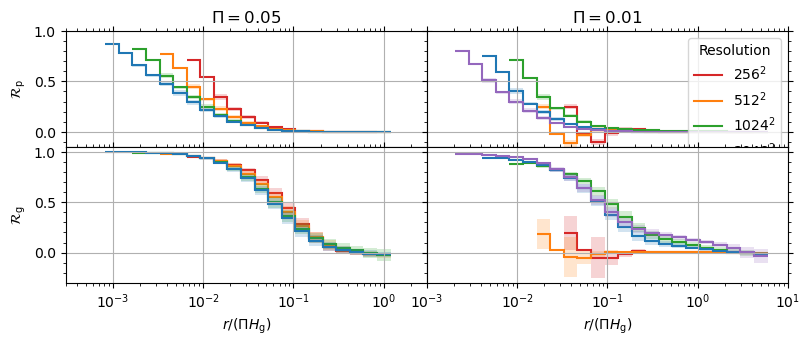

In [ ]:
#==============================================================================
import sys
sys.path.insert(0, '/home/stanley/bitbucket/ccyang/athena-dust/vis/python')
import athena_read
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

def norms(xv, zv, pole):
    rv = np.zeros((len(zv), len(xv)))
    for i, z in enumerate(zv):
        for j, x in enumerate(xv):
            rv[i][j] = np.sqrt((x - pole[0])**2 + (z - pole[1])**2)
    return rv

y0lim, y1lim = (-0.15, 1), (-0.3, 1.05)
yratio = (y1lim[1] - y1lim[0])/(y0lim[1] - y0lim[0])
fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', height_ratios=[1, yratio],
                        figsize=(9.32, 3.27))
workdir = '../unstrat'
case = 'AB'
Pis = [0.05, 0.01]
reses = [[256, 'tab:red'], [512, 'tab:orange'],
         [1024, 'tab:green'], [2048, 'tab:blue'],
         [4096, 'tab:purple']]

for j, Pi in enumerate(Pis):
    for i, res in enumerate(reses):
        if Pi == 0.05 and res[0] == 4096: break
        # Collect inputs
        path = f'{workdir}/{case}/{Pi}/{res[0]}'
        npz = np.load(f'{path}/npz/avgRs.npz')
        athinput = athena_read.athinput(f'{path}/athinput.si')
        c_s = athinput['hydro']['iso_sound_speed']
        Omega = athinput['problem']['omega']
        H_g = c_s/Omega
        data = athena_read.athdf(f'{path}/athdf/SI.out1.00100.athdf')
        xv, zv = data['x1v']/H_g, data['x2v']/H_g
        x0, z0 = len(xv)//2, len(zv)//2
        pole = (xv[x0], zv[z0])
        rv = norms(xv, zv, pole).ravel()
        indices = np.where(rv > xv[-1])[0]
        indices = np.append(indices, np.where(rv == 0)[0])
        rv = np.delete(rv, indices)
        r0 = xv[x0]
        base = np.sqrt(2)
        leftmost_edge = r0/np.sqrt(base)
        num = int(np.sqrt(res[0]))
        bin_edges = leftmost_edge*np.logspace(0, num, num=(num + 1), base=base)

        # Bin dust
        avgRp = np.delete(npz['avgRps'], indices).ravel()
        dust_means, bin_edges, binnumnber = stats.binned_statistic(rv, avgRp,
            statistic='mean', bins=bin_edges)
        dust_stds, bin_edges, binnumnber = stats.binned_statistic(rv, avgRp,
            statistic='std', bins=bin_edges)
        dust_highs = dust_means + dust_stds
        dust_lows = dust_means - dust_stds

        # Bin gas
        avgRg = np.delete(npz['avgRgs'], indices).ravel()
        gas_means, bin_edges, binnumnber = stats.binned_statistic(rv, avgRg,
            statistic='mean', bins=bin_edges)
        gas_stds, bin_edges, binnumnber = stats.binned_statistic(rv, avgRg,
            statistic='std', bins=bin_edges)
        gas_highs = gas_means + gas_stds
        gas_lows = gas_means - gas_stds

        # Plot histograms
        axs[0][j].stairs(dust_means, bin_edges/float(Pi), color=res[1],
                         baseline=float('-inf'), lw=1.5, label=f'{res[0]}$^2$')
        axs[0][j].stairs(dust_highs, bin_edges/float(Pi), baseline=dust_lows,
                         fill=True, color=res[1], alpha=0.2)
        axs[1][j].stairs(gas_means, bin_edges/float(Pi), color=res[1], lw=1.5,
                         baseline=float('-inf'))
        axs[1][j].stairs(gas_highs, bin_edges/float(Pi), baseline=gas_lows,
                         fill=True, color=res[1], alpha=0.2)

for ax in axs.flat:
    ax.grid()
    ax.label_outer()
    ax.minorticks_on()
    ax.tick_params(axis='both', which='both', top=True, right=True)

# Format and save figure
axs[0][0].set(ylim=y0lim, ylabel=r'$\mathcal{R}_\mathrm{p}$',
              title=f'$\Pi = {Pis[0]}$')
axs[0][1].set(title=f'$\Pi = {Pis[1]}$')
axs[0][1].plot([], [], color=reses[4][1], label=str(reses[4][0])+r'$^2$')
axs[0][1].legend(loc='upper right', title='Resolution')
axs[1][0].set(ylim=y1lim, ylabel=r'$\mathcal{R}_\mathrm{g}$',
              xlim=(3e-4, 3e0), xscale='log', xlabel=r'$r/(\Pi H_\mathrm{g})$')
axs[1][1].set(xlim=(1e-3, 1e1), xscale='log', xlabel=r'$r/(\Pi H_\mathrm{g})$')
plt.subplots_adjust(hspace=0, wspace=0)
plt.savefig(f'figs/res_{case}_avgRs_rad-prof.pdf', bbox_inches='tight',
            pad_inches=0.01)


### AB, ($\Pi = 0.01$) Snapshots

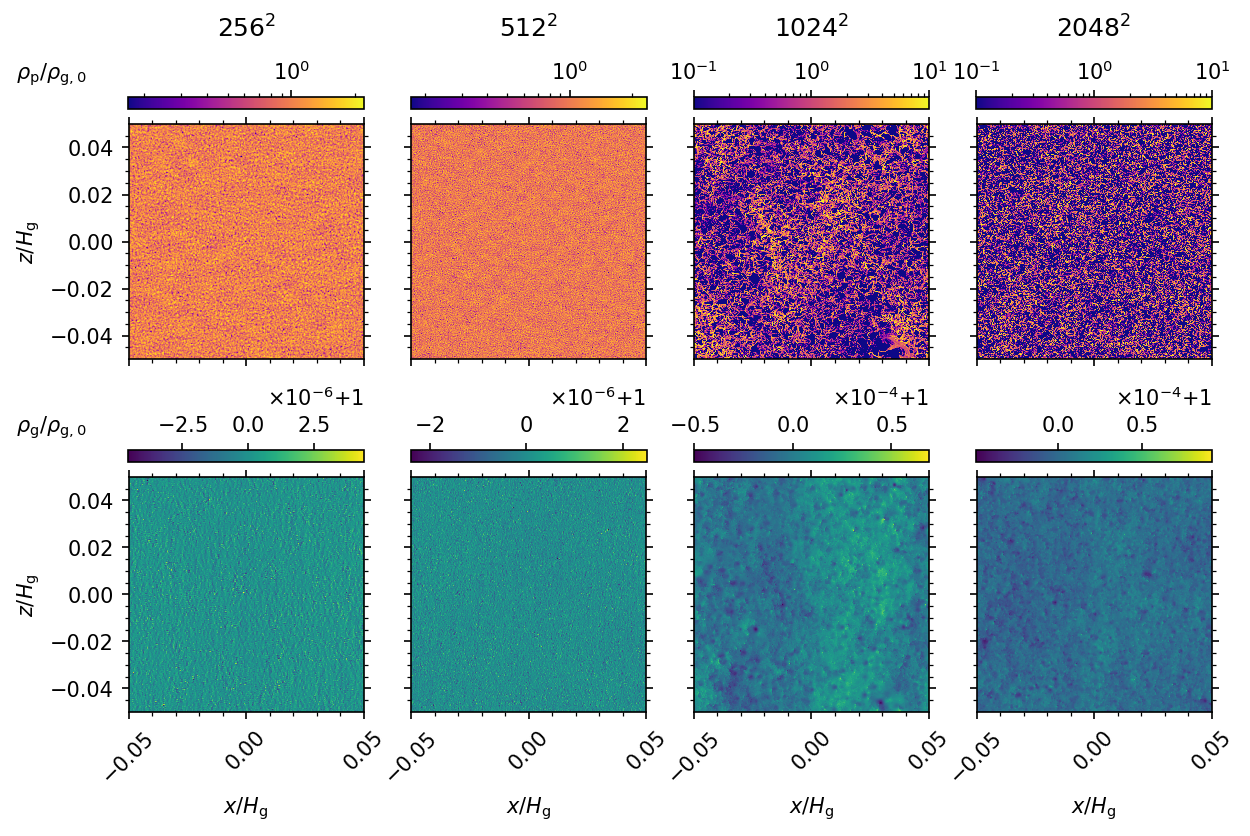

In [ ]:
#==============================================================================
import sys
sys.path.insert(0, '/home/stanley/bitbucket/ccyang/athena-dust/vis/python')
import athena_read
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.ticker as ticker
import numpy as np

mpl.rcParams["axes.formatter.offset_threshold"] = 2
fig, axs = plt.subplots(2, 4, sharex=True, sharey=True, figsize=(9.32, 5.6),
                        dpi=150)
workdir = '../unstrat'
case = 'AB'
Pi = 0.01
reses = ['256', '512', '1024', '2048']
vmin_p, vmax_p = 1e-1, 1e1 # AB CPDD > 85%; CPDD < 5%

for i, res in enumerate(reses):
    # Collect parameters and plot densities
    path = f'{workdir}/{case}/{Pi}/{res}'
    athinput = athena_read.athinput(f'{path}/athinput.si')
    c_s = athinput['hydro']['iso_sound_speed']
    Omega = athinput['problem']['omega']
    H_g = c_s/Omega
    data = athena_read.athdf(f'{path}/athdf/SI.out1.00100.athdf')
    xv, zv = data['x1v']/H_g, data['x2v']/H_g
    clip = np.clip(data['rhop'][0], vmin_p, vmax_p)
    rhops = axs[0][i].pcolormesh(xv, zv, clip, norm=colors.LogNorm(),
                                 cmap='plasma')
    rhogs = axs[1][i].pcolormesh(xv, zv, data['rho'][0])

    # Add and format dust color bars, titles, and x-axis labels
    cb_rhop = fig.colorbar(rhops, ax=axs[0][i], location='top')
    axs[0][i].set_title(f'{res}$^2$', pad=42)
    axs[0][i].set(aspect='equal')
    axs[1][i].set(xlabel=r'$x/H_\mathrm{g}$', aspect='equal')

    # Add and format gas color bars
    formatter = ticker.ScalarFormatter(useMathText=True)
    formatter.set_powerlimits((-1, 1))
    cb_rhog = fig.colorbar(rhogs, ax=axs[1][i], location='top',
                           format=formatter)

for ax in axs.flat:
    ax.label_outer()
    ax.minorticks_on()
    ax.set(aspect='equal')
    ax.tick_params(axis='both', which='both', top=True, right=True)
    ax.tick_params(axis='x', labelrotation=45)

# Format and save figure
xticks = [-0.05, 0, 0.05]
axs[0][0].text(-0.48, 1.27, r'$\rho_\mathrm{p}/\rho_\mathrm{g,0}$',
               ha='left', va='top', transform=axs[0][0].transAxes)
axs[1][0].text(-0.48, 1.27, r'$\rho_\mathrm{g}/\rho_\mathrm{g,0}$',
               ha='left', va='top', transform=axs[1][0].transAxes)
axs[0][0].set(ylabel=r'$z/H_\mathrm{g}$')
axs[1][0].set(ylabel=r'$z/H_\mathrm{g}$', xticks=xticks)
plt.savefig(f'figs/png/res_{case}-{Pi}_snaps.png', dpi=800, bbox_inches='tight',
            pad_inches=0.03)
plt.show()

### AB, ($\Pi = 0.05$) Snapshots

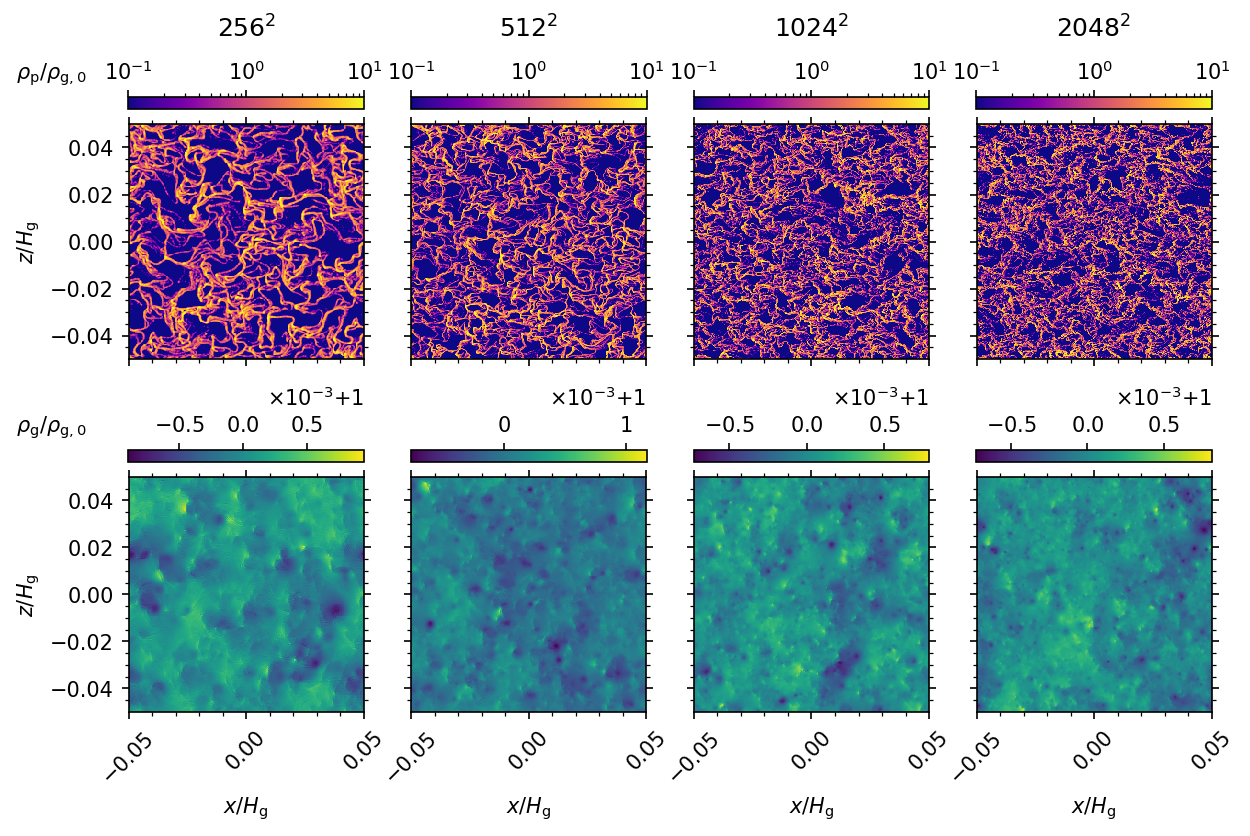

In [ ]:
#==============================================================================
import sys
sys.path.insert(0, '/home/stanley/bitbucket/ccyang/athena-dust/vis/python')
import athena_read
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.ticker as ticker
import numpy as np

mpl.rcParams["axes.formatter.offset_threshold"] = 2
fig, axs = plt.subplots(2, 4, sharex=True, sharey=True, figsize=(9.32, 5.6),
                        dpi=150)
workdir = '../unstrat'
case = 'AB'
Pi = 0.05
reses = ['256', '512', '1024', '2048']
vmin_p, vmax_p = 1e-1, 1e1 # AB CPDD > 85%; CPDD < 5%

for i, res in enumerate(reses):
    # Collect parameters and plot densities
    path = f'{workdir}/{case}/{Pi}/{res}'
    athinput = athena_read.athinput(f'{path}/athinput.si')
    c_s = athinput['hydro']['iso_sound_speed']
    Omega = athinput['problem']['omega']
    H_g = c_s/Omega
    data = athena_read.athdf(f'{path}/athdf/SI.out1.00100.athdf')
    xv, zv = data['x1v']/H_g, data['x2v']/H_g
    clip = np.clip(data['rhop'][0], vmin_p, vmax_p)
    rhops = axs[0][i].pcolormesh(xv, zv, clip, norm=colors.LogNorm(),
                                 cmap='plasma')
    rhogs = axs[1][i].pcolormesh(xv, zv, data['rho'][0])

    # Add and format dust color bars, titles, and x-axis labels
    cb_rhop = fig.colorbar(rhops, ax=axs[0][i], location='top')
    axs[0][i].set_title(f'{res}$^2$', pad=42)
    axs[0][i].set(aspect='equal')
    axs[1][i].set(xlabel=r'$x/H_\mathrm{g}$', aspect='equal')

    # Add and format gas color bars
    formatter = ticker.ScalarFormatter(useMathText=True)
    formatter.set_powerlimits((-1, 1))
    cb_rhog = fig.colorbar(rhogs, ax=axs[1][i], location='top',
                           format=formatter)

for ax in axs.flat:
    ax.label_outer()
    ax.minorticks_on()
    ax.set(aspect='equal')
    ax.tick_params(axis='both', which='both', top=True, right=True)
    ax.tick_params(axis='x', labelrotation=45)

# Format and save figure
xticks = [-0.05, 0, 0.05]
axs[0][0].text(-0.48, 1.27, r'$\rho_\mathrm{p}/\rho_\mathrm{g,0}$',
               ha='left', va='top', transform=axs[0][0].transAxes)
axs[1][0].text(-0.48, 1.27, r'$\rho_\mathrm{g}/\rho_\mathrm{g,0}$',
               ha='left', va='top', transform=axs[1][0].transAxes)
axs[0][0].set(ylabel=r'$z/H_\mathrm{g}$')
axs[1][0].set(ylabel=r'$z/H_\mathrm{g}$', xticks=xticks)
plt.savefig(f'figs/png/res_{case}-{Pi}_snaps.png', dpi=800, bbox_inches='tight',
            pad_inches=0.03)
plt.show()

### BA, ($\Pi = 0.01$) Final Snapshots

### Densities ($\Pi = 0.05$)

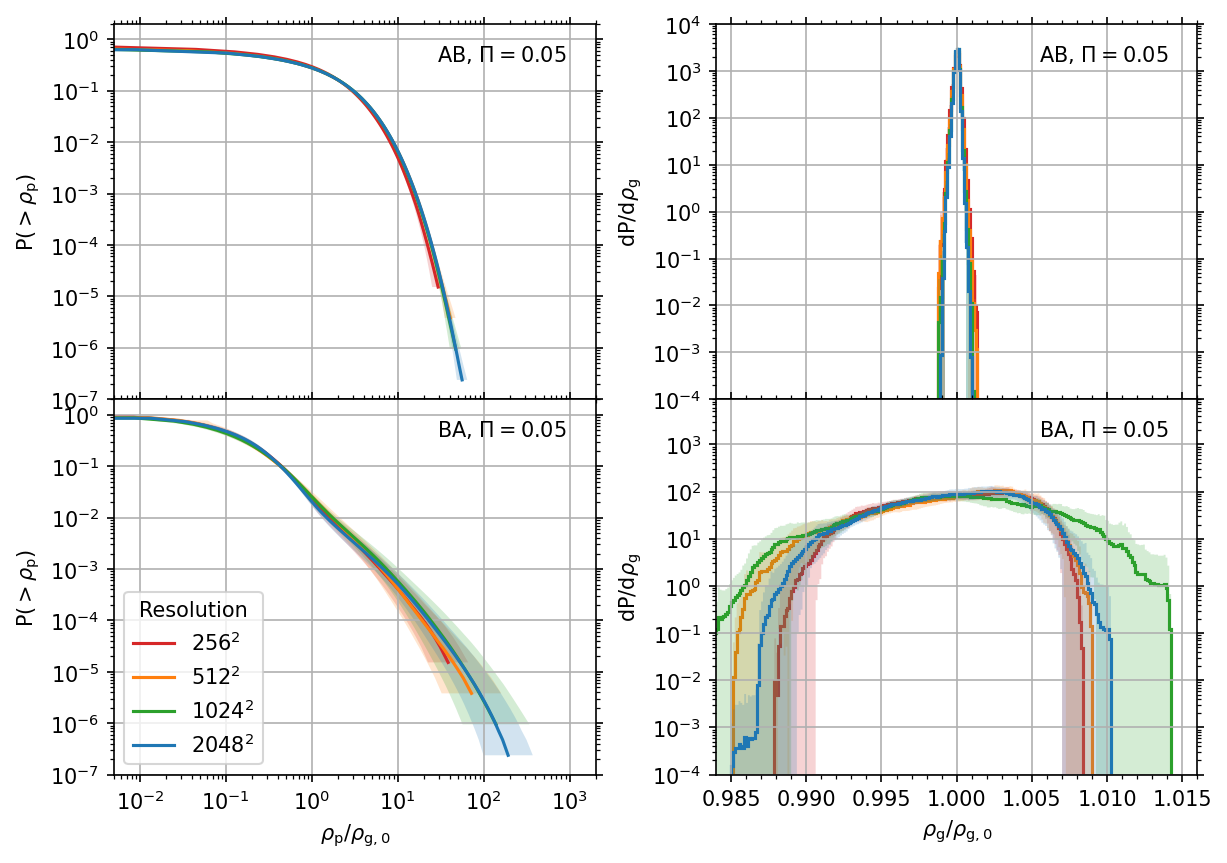

In [ ]:
#==============================================================================
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fig, axs = plt.subplots(2, 2, sharex='col', figsize=(9.32, 6.5), dpi=150)
workdir = '../unstrat'
cases = ['AB', 'BA']
Pi = 0.05
reses = [['256', 'tab:red'], ['512', 'tab:orange'],
       ['1024', 'tab:green'], ['2048', 'tab:blue']]
runs, avg_maxs, err_maxs = [], [[], []], [[], []]

for i, case in enumerate(cases):
    for res in reses:
        indices = -np.unique(np.logspace(np.log2(int(res[0])**2), 0, num=100,
                     base=2, dtype=int))
        path = f'{workdir}/{cases[i]}/{Pi}/{res[0]}' 
        runs.append(f'{cases[i]}/{Pi}/{res[0]}')
        
        # Plot dust density CDF
        data = np.load(f'{path}/npz/cpdd.npz')
        take = np.take_along_axis(data['cdf'], indices, 0)
        cdf = np.flip(take)
        take = np.take_along_axis(data['avgs'], indices, 0)
        avgs = np.flip(take)
        take = np.take_along_axis(data['stds'], indices, 0)
        stds = np.flip(take)
        axs[i][0].loglog(avgs, cdf, color=res[1], label=f'{res[0]}$^2$')
        axs[i][0].fill_betweenx(cdf, avgs/stds, avgs*stds, color=res[1],
                                ec=None, alpha=0.2)
        avg_maxs[0].append(avgs[-1])
        err_maxs[0].append(stds[-1])

        # Plot gas density PDF
        npz = np.load(f'{path}/npz/gas_densities.npz')
        bin_hi_rhos = npz['bin_avg_rhos'] + npz['bin_std_rhos']
        bin_lo_rhos = npz['bin_avg_rhos'] - npz['bin_std_rhos']
        axs[i][1].stairs(npz['bin_avg_rhos'], npz['bin_edges'],
                            color=res[1], lw=1.5)
        axs[i][1].stairs(bin_hi_rhos, npz['bin_edges'], fill=True,
                            baseline=bin_lo_rhos, color=res[1],alpha=0.2)
        avg_maxs[1].append(avgs[-1])
        err_maxs[1].append(stds[-1])

for ax in axs.flat:
    ax.grid()
    ax.minorticks_on()
    ax.tick_params(which='both', top=True, right=True)

dylim = (1e-7, 2e0)
axs[0][0].set(ylabel=r'P$(>\rho_\mathrm{p})$', ylim=dylim)
axs[0][0].text(0.94, 0.95, f'AB, $\Pi={Pi}$', ha='right', va='top',
               transform=axs[0][0].transAxes)
axs[0][1].set(yscale='log', ylabel=r'$\mathrm{dP}/\mathrm{d}\rho_\mathrm{g}$',
              ylim=(1e-4, 1e4))
axs[0][1].text(0.94, 0.95, f'AB, $\Pi={Pi}$', ha='right', va='top',
               transform=axs[0][1].transAxes)
axs[1][0].legend(loc='lower left', title='Resolution')
axs[1][0].set(xlim=(5e-3, 2e3), ylim=dylim,
              xlabel=r'$\rho_\mathrm{p}/\rho_\mathrm{g,0}$',
              ylabel=r'P$(>\rho_\mathrm{p})$')
axs[1][0].text(0.94, 0.95, f'BA, $\Pi={Pi}$', ha='right', va='top',
               transform=axs[1][0].transAxes)
axs[1][1].set(ylim=(1e-4, 9e3), yscale='log', xlim=(0.984, 1.016),
              xlabel=r'$\rho_\mathrm{g}/\rho_\mathrm{g,0}$',
              ylabel=r'$\mathrm{dP}/\mathrm{d}\rho_\mathrm{g}$')
axs[1][1].text(0.94, 0.95, f'BA, $\Pi={Pi}$', ha='right', va='top',
               transform=axs[1][1].transAxes)
plt.subplots_adjust(hspace=0, wspace=0.25)
plt.savefig(f'figs/res-{Pi}_densities.pdf', bbox_inches='tight', pad_inches=0.01)
# plt.savefig('figs/png/res_densities.png', bbox_inches='tight', pad_inches=0.01, dpi=1200)

df = pd.DataFrame({
    'Run'             : runs,
    '⟨max(𝜌ₚ)⟩/𝜌₀'   : avg_maxs[0],
    '+𝜎_max(𝜌ₚ)/𝜌₀' : np.asarray(avg_maxs[0])*(1*np.asarray(err_maxs[0]) - 1),
    '-𝜎_max(𝜌ₚ)/𝜌₀' : np.asarray(avg_maxs[0])*(1/np.asarray(err_maxs[0]) - 1),})
    # '⟨max(𝜌)⟩/𝜌₀'   : (np.asarray(avg_maxs[1]) - 1),
    # '𝜎_max(𝜌)/𝜌₀'  : err_maxs[1]})
s = df.style.format({
    '⟨max(𝜌ₚ)⟩/𝜌₀'   : '{:.1f}',
    '+𝜎_max(𝜌ₚ)/𝜌₀' : '{:.1f}',
    '-𝜎_max(𝜌ₚ)/𝜌₀' : '{:.1f}',})
    # '⟨max(𝜌)⟩/𝜌₀'   : '1 + {:.1e}',
    # '𝜎_max(𝜌)/𝜌₀'  : '±{:.1e}'})
s.to_latex(buf='tabs/densities.sty')
s

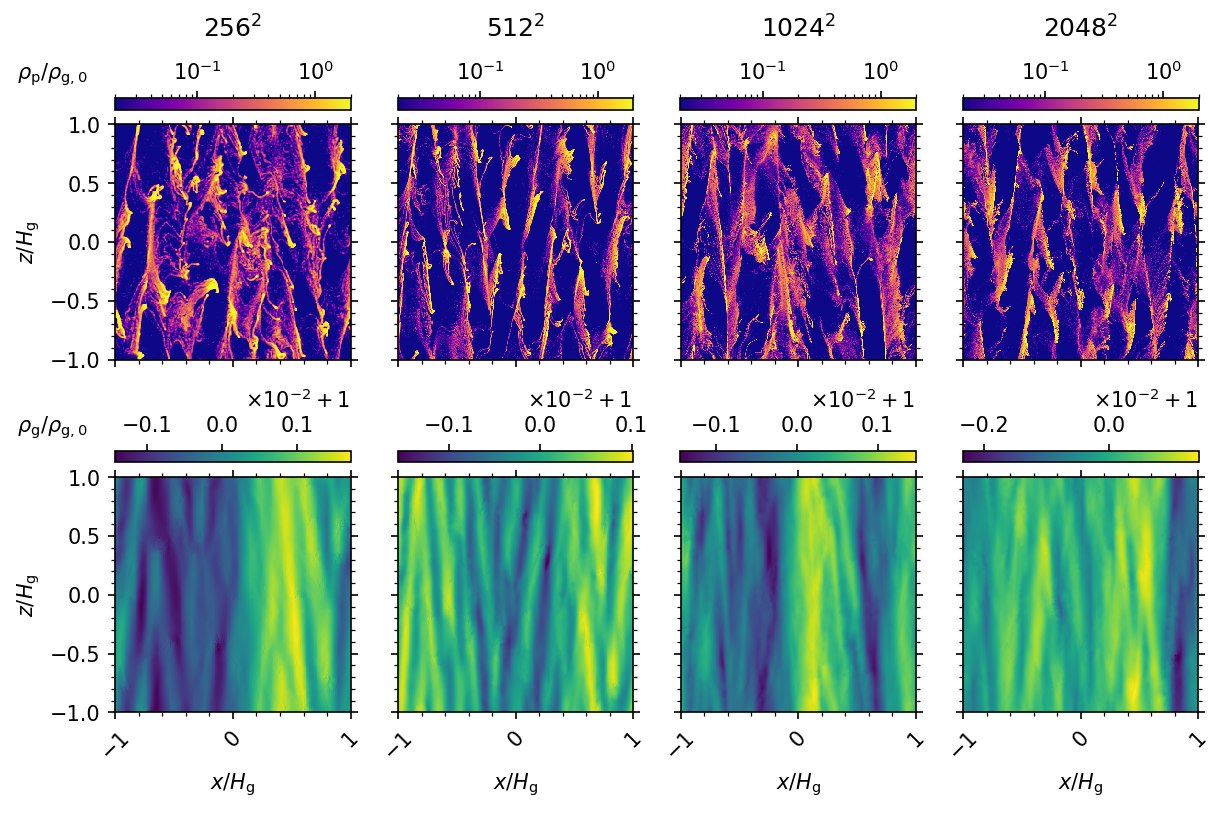

In [ ]:
#==============================================================================
import sys
sys.path.insert(0, '/home/stanley/bitbucket/ccyang/athena-dust/vis/python')
import athena_read
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np

fig, axs = plt.subplots(2, 4, sharex=True, sharey=True, figsize=(9.32, 5.6),
                        dpi=150)
workdir = '../unstrat'
case = 'BA'
Pi = 0.01
reses = ['256', '512', '1024', '2048']
vmin_p, vmax_p = 2e-2, 2e0 # BA CPDD > 85%; CPDD < 5%

for i, res in enumerate(reses):
    # Collect parameters and plot densities
    path = f'{workdir}/{case}/{Pi}/{res}'
    athinput = athena_read.athinput(f'{path}/athinput.si')
    c_s = athinput['hydro']['iso_sound_speed']
    Omega = athinput['problem']['omega']
    H_g = c_s/Omega
    data = athena_read.athdf(f'{path}/athdf/SI.out1.00200.athdf')
    xv, zv = data['x1v']/H_g, data['x2v']/H_g
    clip = np.clip(data['rhop'][0], vmin_p, vmax_p)
    rhops = axs[0][i].pcolormesh(xv, zv, clip, norm=colors.LogNorm(),
                                 cmap='plasma')
    offset = (data['rho'][0] - 1)*1e2
    rhogs = axs[1][i].pcolormesh(xv, zv, offset)

    # Add and format dust color bars, titles, and x-axis labels
    cb_rhop = fig.colorbar(rhops, ax=axs[0][i], location='top')
    axs[0][i].set_title(f'{res}$^2$', pad=42)
    axs[0][i].set(aspect='equal')
    axs[1][i].set(xlabel=r'$x/H_\mathrm{g}$', aspect='equal')

    # Add and format gas color bars
    cb_rhog = fig.colorbar(rhogs, ax=axs[1][i], location='top')
    axs[1][i].text(0.55, 1.38, r'$\times10^{-2}+1$', ha='left',
                   va='top', transform=axs[1][i].transAxes)

for ax in axs.flat:
    ax.label_outer()
    ax.minorticks_on()
    ax.set(aspect='equal')
    ax.tick_params(axis='both', which='both', top=True, right=True)
    ax.tick_params(axis='x', labelrotation=45)

# Format and save figure
axs[0][0].text(-0.42, 1.27, r'$\rho_\mathrm{p}/\rho_\mathrm{g,0}$',
               ha='left', va='top', transform=axs[0][0].transAxes)
axs[1][0].text(-0.42, 1.27, r'$\rho_\mathrm{g}/\rho_\mathrm{g,0}$',
               ha='left', va='top', transform=axs[1][0].transAxes)
axs[0][0].set(ylabel=r'$z/H_\mathrm{g}$')
axs[1][0].set(ylabel=r'$z/H_\mathrm{g}$')
plt.savefig(f'figs/png/res_{case}-{Pi}_snaps.png', dpi=800, bbox_inches='tight',
            pad_inches=0.03)
plt.show()

In [ ]:
### BA, ($\Pi = 0.05$) $t = 100T$

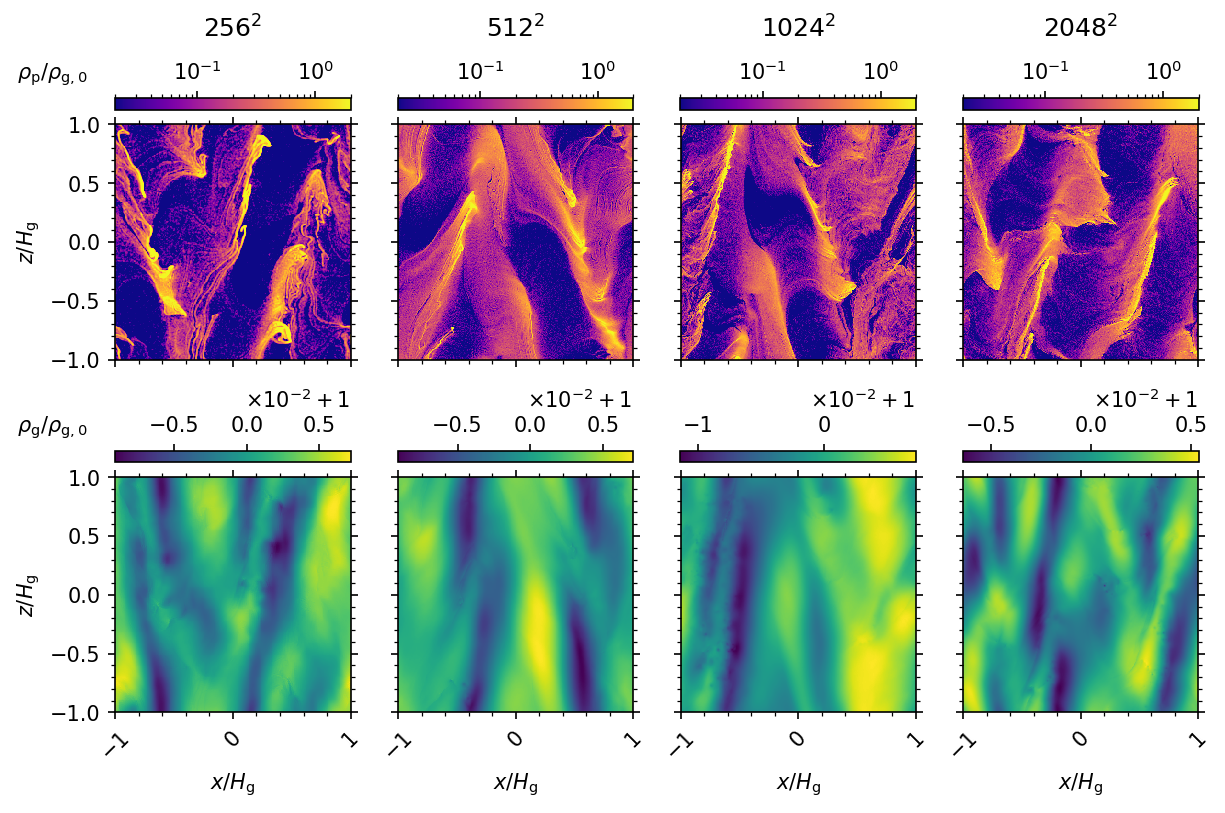

In [ ]:
#==============================================================================
import sys
sys.path.insert(0, '/home/stanley/bitbucket/ccyang/athena-dust/vis/python')
import athena_read
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np

fig, axs = plt.subplots(2, 4, sharex=True, sharey=True, figsize=(9.32, 5.6),
                        dpi=150)
workdir = '../unstrat'
case = 'BA'
Pi = 0.05
reses = ['256', '512', '1024', '2048']
vmin_p, vmax_p = 2e-2, 2e0 # BA CPDD > 85%; CPDD < 5%

for i, res in enumerate(reses):
    # Collect parameters and plot densities
    path = f'{workdir}/{case}/{Pi}/{res}'
    athinput = athena_read.athinput(f'{path}/athinput.si')
    c_s = athinput['hydro']['iso_sound_speed']
    Omega = athinput['problem']['omega']
    H_g = c_s/Omega
    data = athena_read.athdf(f'{path}/athdf/SI.out1.00100.athdf')
    # data = athena_read.athdf(f'{path}/athdf/SI.out1.00200.athdf')
    xv, zv = data['x1v']/H_g, data['x2v']/H_g
    clip = np.clip(data['rhop'][0], vmin_p, vmax_p)
    rhops = axs[0][i].pcolormesh(xv, zv, clip, norm=colors.LogNorm(),
                                 cmap='plasma')
    offset = (data['rho'][0] - 1)*1e2
    rhogs = axs[1][i].pcolormesh(xv, zv, offset)

    # Add and format dust color bars, titles, and x-axis labels
    cb_rhop = fig.colorbar(rhops, ax=axs[0][i], location='top')
    axs[0][i].set_title(f'{res}$^2$', pad=42)
    axs[0][i].set(aspect='equal')
    axs[1][i].set(xlabel=r'$x/H_\mathrm{g}$', aspect='equal')

    # Add and format gas color bars
    cb_rhog = fig.colorbar(rhogs, ax=axs[1][i], location='top')
    axs[1][i].text(0.55, 1.38, r'$\times10^{-2}+1$', ha='left',
                   va='top', transform=axs[1][i].transAxes)

for ax in axs.flat:
    ax.label_outer()
    ax.minorticks_on()
    ax.set(aspect='equal')
    ax.tick_params(axis='both', which='both', top=True, right=True)
    ax.tick_params(axis='x', labelrotation=45)

# Format and save figure
axs[0][0].text(-0.42, 1.27, r'$\rho_\mathrm{p}/\rho_\mathrm{g,0}$',
               ha='left', va='top', transform=axs[0][0].transAxes)
axs[1][0].text(-0.42, 1.27, r'$\rho_\mathrm{g}/\rho_\mathrm{g,0}$',
               ha='left', va='top', transform=axs[1][0].transAxes)
axs[0][0].set(ylabel=r'$z/H_\mathrm{g}$')
axs[1][0].set(ylabel=r'$z/H_\mathrm{g}$')
plt.savefig(f'figs/png/res_{case}-{Pi}_snaps.png', dpi=800, bbox_inches='tight',
            pad_inches=0.03)
plt.show()

## Old

### AB, ($\Pi = 0.05$), Auto-correlation Radial Profile

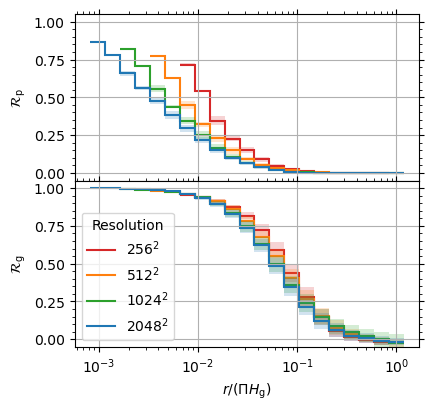

In [ ]:
#==============================================================================
import sys
sys.path.insert(0, '/home/stanley/bitbucket/ccyang/athena-dust/vis/python')
import athena_read
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

def norms(xv, zv, pole):
    rv = np.zeros((len(zv), len(xv)))
    for i, z in enumerate(zv):
        for j, x in enumerate(xv):
            rv[i][j] = np.sqrt((x - pole[0])**2 + (z - pole[1])**2)
    return rv

fig, axs = plt.subplots(2, sharex=True, figsize=(4.45, 4.32))
workdir = '../unstrat'
case = 'AB'
Pi = 0.05
reses = [[256, 'tab:red'], [512, 'tab:orange'],
       [1024, 'tab:green'], [2048, 'tab:blue']]


for i, res in enumerate(reses):
    # Collect inputs
    path = f'{workdir}/{case}/{Pi}/{res[0]}'
    npz = np.load(f'{path}/npz/avgRs.npz')
    athinput = athena_read.athinput(f'{path}/athinput.si')
    c_s = athinput['hydro']['iso_sound_speed']
    Omega = athinput['problem']['omega']
    H_g = c_s/Omega
    data = athena_read.athdf(f'{path}/athdf/SI.out1.00100.athdf')
    xv, zv = data['x1v']/H_g, data['x2v']/H_g
    x0, z0 = len(xv)//2, len(zv)//2
    pole = (xv[x0], zv[z0])
    rv = norms(xv, zv, pole).ravel()
    indices = np.where(rv > xv[-1])[0]
    indices = np.append(indices, np.where(rv == 0)[0])
    rv = np.delete(rv, indices)
    r0 = xv[x0]
    base = np.sqrt(2)
    leftmost_edge = r0/np.sqrt(base)
    num = int(np.sqrt(res[0]))
    bin_edges = leftmost_edge*np.logspace(0, num, num=(num + 1), base=base)

    # Bin dust
    avgRp = np.delete(npz['avgRps'], indices).ravel()
    dust_means, bin_edges, binnumnber = stats.binned_statistic(rv, avgRp,
        statistic='mean', bins=bin_edges)
    dust_stds, bin_edges, binnumnber = stats.binned_statistic(rv, avgRp,
        statistic='std', bins=bin_edges)
    dust_highs = dust_means + dust_stds
    dust_lows = dust_means - dust_stds

    # Bin gas
    avgRg = np.delete(npz['avgRgs'], indices).ravel()
    gas_means, bin_edges, binnumnber = stats.binned_statistic(rv, avgRg,
        statistic='mean', bins=bin_edges)
    gas_stds, bin_edges, binnumnber = stats.binned_statistic(rv, avgRg,
        statistic='std', bins=bin_edges)
    gas_highs = gas_means + gas_stds
    gas_lows = gas_means - gas_stds

    # Plot histograms
    axs[0].stairs(dust_means, bin_edges/float(Pi), baseline=float('-inf'),
                  color=res[1], lw=1.5)
    axs[0].stairs(dust_highs, bin_edges/float(Pi), baseline=dust_lows,
                  fill=True, color=res[1], alpha=0.2)
    axs[1].stairs(gas_means, bin_edges/float(Pi), baseline=float('-inf'),
                  color=res[1], lw=1.5, label=f'{res[0]}$^2$')
    axs[1].stairs(gas_highs, bin_edges/float(Pi), baseline=gas_lows,
                  fill=True, color=res[1], alpha=0.2)

for ax in axs.flat:
    ax.grid()
    ax.label_outer()
    ax.minorticks_on()
    ax.tick_params(axis='both', which='both', top=True, right=True)

# Format and save figure
axs[0].set(ylim=(-0.05, 1.05), ylabel=r'$\mathcal{R}_\mathrm{p}$')
axs[1].legend(loc='lower left', title='Resolution')
axs[1].set(ylim=(-0.05, 1.05), xscale='log', xlabel=r'$r/(\Pi H_\mathrm{g})$',
           ylabel=r'$\mathcal{R}_\mathrm{g}$')
plt.subplots_adjust(hspace=0)
plt.savefig(f'figs/res_{case}-{Pi}_avgRs_rad-prof.pdf', bbox_inches='tight',
            pad_inches=0.01)


### CPDD

AB/0.05/256 : 18.9% ρₚ = 0
AB/0.05/512 : 26.2% ρₚ = 0
AB/0.05/1024: 29.0% ρₚ = 0
AB/0.05/2048: 30.4% ρₚ = 0


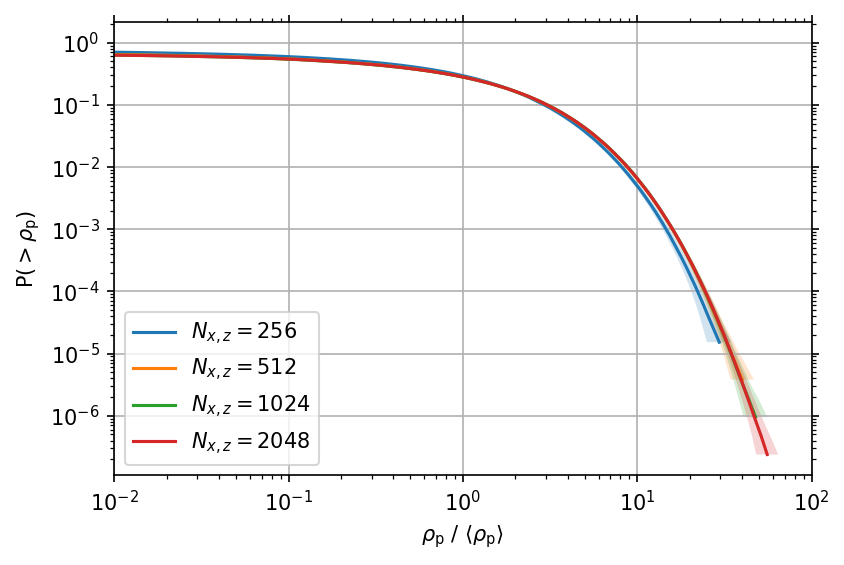

In [4]:
fig, ax = plt.subplots(dpi=150)
run = 'AB'
xlim = (1e-2, 1e2)
Pi = '0.05'
ress = ['256', '512', '1024', '2048']

for res in ress:
    data = np.load('../unstrat/%s/%s/%s/output/cpdd.npz'%(run, Pi, res))
    nonzeros = np.count_nonzero(data['avgs'])
    size = data['avgs'].size
    zeros = size - nonzeros
    print('{}/{}/{:<4}: {:.1f}% ρₚ = 0'.format(run, Pi, res, 100*zeros/size))
    ax.loglog(data['avgs'], data['cdf'], label=r'$N_{x,z}=$'+res)
    ax.fill_betweenx(data['cdf'], data['avgs']/data['stds'],
                     data['avgs']*data['stds'], alpha=0.2)

ax.grid()
ax.legend()
ax.minorticks_on()
ax.set(xlim=xlim, xlabel=r'$\rho_\mathrm{p}$ / $\langle \rho_\mathrm{p} \rangle$',
       ylabel=r'P$(>\rho_\mathrm{p})$')
ax.tick_params(axis='both', which='both', top=True, right=True)


### ΒΑ, Π=0.05
$\tau_S=1.0$

$\epsilon=0.2$

### DDD

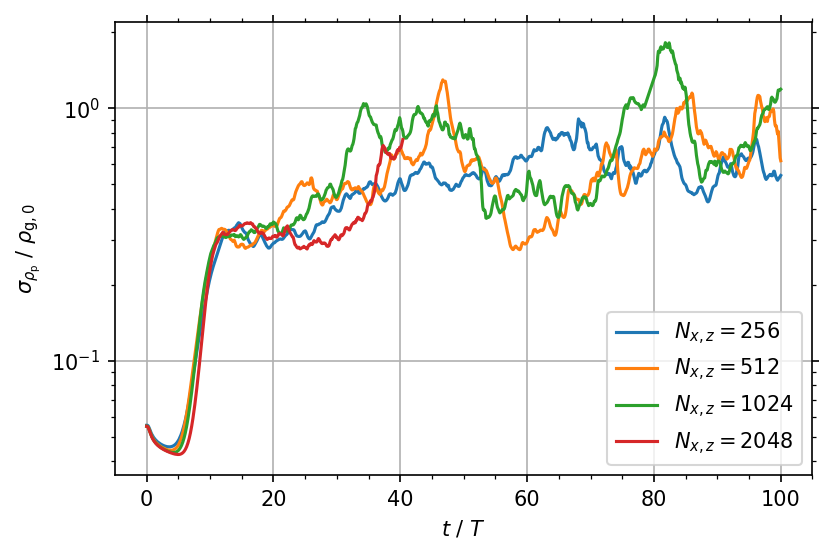

In [5]:
fig, ax = plt.subplots(dpi=150)
run = 'BA'
Pi = '0.05'
ress = ['256', '512', '1024', '2048']

for res in ress:
    hst = athena_read.hst('../unstrat/%s/%s/%s/output/SI.hst'%(run, Pi, res))
    times = hst['time']
    rhop_amps = np.sqrt(hst['drhop2'] - hst['drhop']**2)
    ax.semilogy(times, rhop_amps, label=r'$N_{x,z}=$'+res)

ax.grid()
ax.legend()
ax.minorticks_on()
ax.set(xlabel=r'$t$ / $T$', ylabel=r'$\sigma_{\rho_\mathrm{p}}$ / $\rho_\mathrm{g,0}$')
ax.tick_params(axis='both', which='both', top=True, right=True)


### CPDD

BA/0.05/256 : 0.3% ρₚ = 0
BA/0.05/512 : 0.2% ρₚ = 0
BA/0.05/1024: 0.5% ρₚ = 0


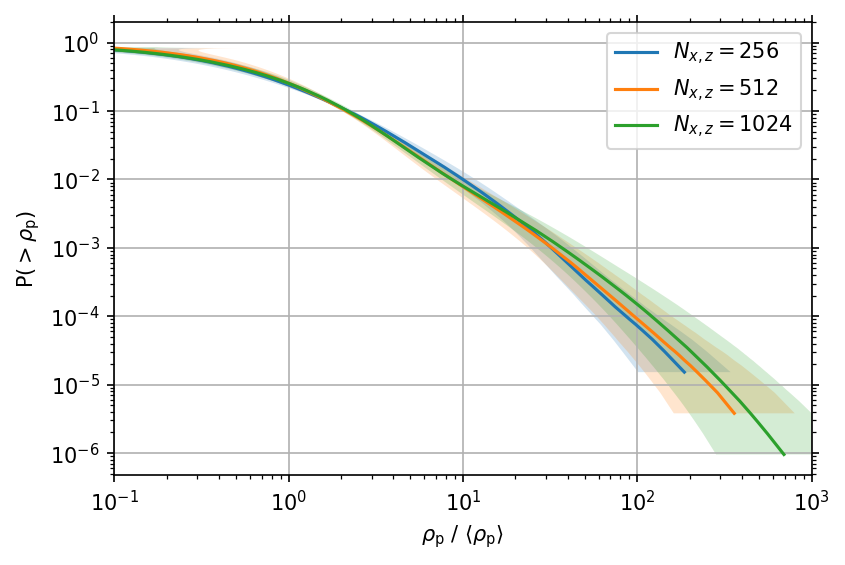

In [6]:
fig, ax = plt.subplots(dpi=150)
run = 'BA'
xlim = (1e-1, 1e3)
Pi = '0.05'
ress = ['256', '512', '1024',]# '2048']

for res in ress:
    data = np.load('../unstrat/%s/%s/%s/output/cpdd.npz'%(run, Pi, res))
    nonzeros = np.count_nonzero(data['avgs'])
    size = data['avgs'].size
    zeros = size - nonzeros
    print('{}/{}/{:<4}: {:.1f}% ρₚ = 0'.format(run, Pi, res, 100*zeros/size))
    ax.loglog(data['avgs'], data['cdf'], label=r'$N_{x,z}=$'+res)
    ax.fill_betweenx(data['cdf'], data['avgs']/data['stds'],
                     data['avgs']*data['stds'], alpha=0.2)

ax.grid()
ax.legend()
ax.minorticks_on()
ax.set(xlim=xlim, xlabel=r'$\rho_\mathrm{p}$ / $\langle \rho_\mathrm{p} \rangle$',
       ylabel=r'P$(>\rho_\mathrm{p})$')
ax.tick_params(axis='both', which='both', top=True, right=True)
